In [37]:
## load libraries 

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

## LOAD THE DATA

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# PREPROCESSING

In [7]:
# print(y_train[0])
y_train = to_categorical(y_train)

y_test = to_categorical(y_test) 
# print(y_train[0])

## BUILD ARCHITECTURE

In [8]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(32,32, 3)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## COMPILE

In [9]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Train

In [10]:
result = model.fit(X_train, y_train, epochs=32, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1868 - loss: 16.2033 - val_accuracy: 0.2785 - val_loss: 1.9702
Epoch 2/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3158 - loss: 1.8780 - val_accuracy: 0.3595 - val_loss: 1.7614
Epoch 3/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3729 - loss: 1.6971 - val_accuracy: 0.4091 - val_loss: 1.6436
Epoch 4/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4230 - loss: 1.5704 - val_accuracy: 0.4262 - val_loss: 1.5682
Epoch 5/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4596 - loss: 1.4763 - val_accuracy: 0.4551 - val_loss: 1.5184
Epoch 6/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4988 - loss: 1.3732 - val_accuracy: 0.4761 - val_loss: 1.5087
Epoch 7/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5319 - loss: 1.3018 - val_accuracy: 0.4755 - val_loss: 1.4834
Epoch 8/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5557 - loss: 1.2367 - val_accuracy: 0

# Evaluate

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.5409 - loss: 1.9854
Test Loss: 2.0050454139709473, Test Accuracy: 0.5371999740600586


## VISUALISATION

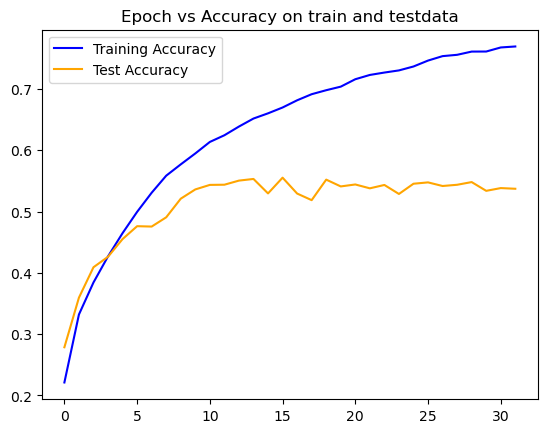

In [12]:
plt.plot(result.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(result.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.legend()
plt.title("Epoch vs Accuracy on train and testdata")
plt.show()

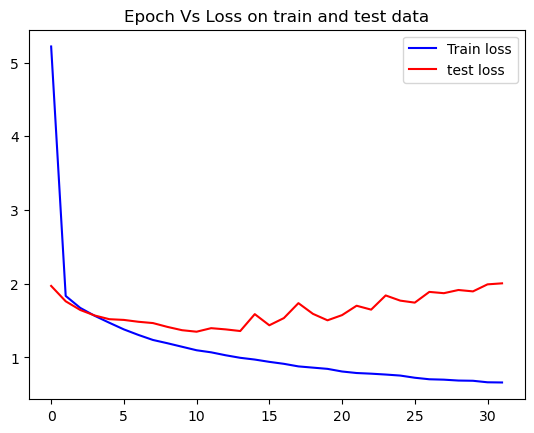

In [13]:
plt.plot(result.history['loss'], label='Train loss', color='blue')
plt.plot(result.history['val_loss'], label='test loss', color='red')
plt.legend()
plt.title("Epoch Vs Loss on train and test data")
plt.show()

## EXPERIMENT 2


ANALYSIS :
Train accuracy is improved over the epochs so, continue training by increasing the number of epochs

HyperParameters:epochs:100

Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1956 - loss: 4.3051 - val_accuracy: 0.3527 - val_loss: 1.8448
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3963 - loss: 1.7117 - val_accuracy: 0.4280 - val_loss: 1.6278
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5036 - loss: 1.4103 - val_accuracy: 0.4595 - val_loss: 1.5598
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5718 - loss: 1.2133 - val_accuracy: 0.4613 - val_loss: 1.5861
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6333 - loss: 1.0432 - val_accuracy: 0.4756 - val_loss: 1.6243
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6801 - loss: 0.9066 - val_accuracy: 0.4827 - val_loss: 1.6882
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7291 - loss: 0.7727 - val_accuracy: 0.4807 - val_loss: 1.8127
Epoch 8/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7705 - loss: 0.6570 - val_accuracy: 0.4815

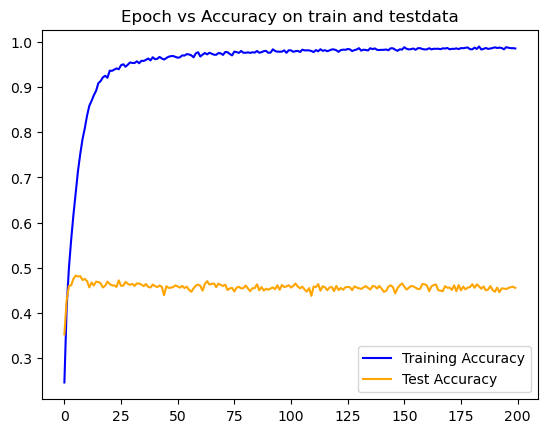

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(32,32, 3)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

result = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


plt.plot(result.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(result.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.legend()
plt.title("Epoch vs Accuracy on train and testdata")
plt.show()

## Experiment 3 

Analysis: Training is very slow So, increase the no of layers

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2736 - loss: 8.5296 - val_accuracy: 0.4516 - val_loss: 1.5340
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4946 - loss: 1.4110 - val_accuracy: 0.5180 - val_loss: 1.3769
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5483 - loss: 1.2681 - val_accuracy: 0.5033 - val_loss: 1.4642
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5829 - loss: 1.1800 - val_accuracy: 0.5256 - val_loss: 1.3623
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6034 - loss: 1.1188 - val_accuracy: 0.5555 - val_loss: 1.3025
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6305 - loss: 1.0565 - val_accuracy: 0.5685 - val_loss: 1.2869
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6488 - loss: 0.9991 - val_accuracy: 0.5565 - val_loss: 1.3692
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6550 - loss: 0.9854 - val_accuracy: 0.

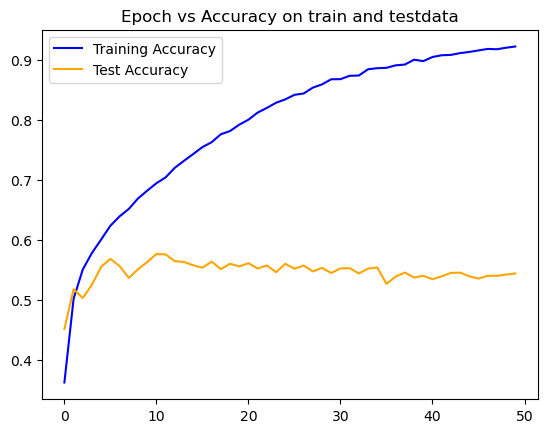

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# print(y_train[0])
y_train = to_categorical(y_train)

y_test = to_categorical(y_test) 
# print(y_train[0])

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(32,32, 3)))
model.add(Dense(units=158, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

result = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


plt.plot(result.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(result.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.legend()
plt.title("Epoch vs Accuracy on train and testdata")
plt.show()

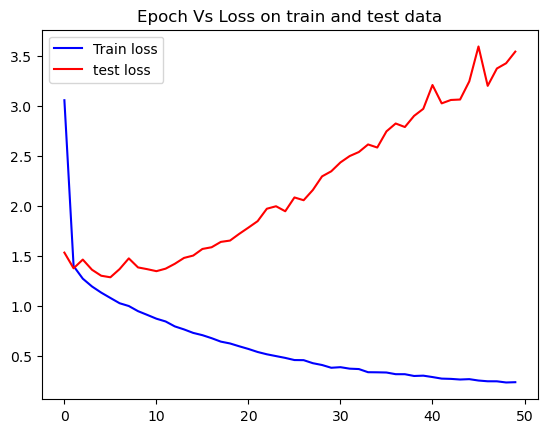

In [15]:
plt.plot(result.history['loss'],label='Train loss', color='blue')
plt.plot(result.history['val_loss'], label='test loss',color='red')
plt.legend()
plt.title("Epoch Vs Loss on train and test data")
plt.show()